# Gravitational Potential of a Black Hole

This Python script calculates the gravitational potential of a single black hole with a given mass, and then visualizes it using a 3D graph. The script uses the NumPy and Matplotlib libraries for scientific computing and data visualization.

The gravitational potential is calculated using the formula U = -M / R, where M is the mass of the black hole, R is the distance between the black hole and a given point in space, and U is the gravitational potential at that point.

The script first defines the constant M, which represents the mass of the black hole. Then, it creates a meshgrid of x, y, and z values using NumPy's `linspace` and `meshgrid` functions. The gravitational potential is then calculated using a double for loop and the previously defined constant, and the resulting values are stored in a 2D array.

Finally, the script creates a 3D graph using Matplotlib's `plot_surface` function, with the gravitational potential as the z-values and x and y as the other two axes. The resulting graph shows the black hole and its gravitational potential well, with a color scheme that represents the strength of the gravitational field.

Overall, this script provides an intuitive and visually appealing way to explore the concept of gravitational potential around a single black hole.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

M1 = 10.0  # mass of first black hole

# Define the range of x, y, and z values
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y) # Make meshgrid for X and Y values
Z = np.zeros((len(y), len(x))) # Make 2D array for Z values

# Calculate the gravitational potential
for i in range(len(x)):
    for j in range(len(y)):
        # Calculate the distance to the first black hole
        R1 = np.sqrt((X[j, i])**2 + Y[j, i]**2 + Z[j, i]**2)
        # "Quantization"
        R1_quant = R1*np.cos((-1)**np.random.randint(2)*np.random.random())
        
        # Calculate the gravitational potential at this point
        U = -M1 / R1_quant
        Z[j, i] = U        

## 1st Plot

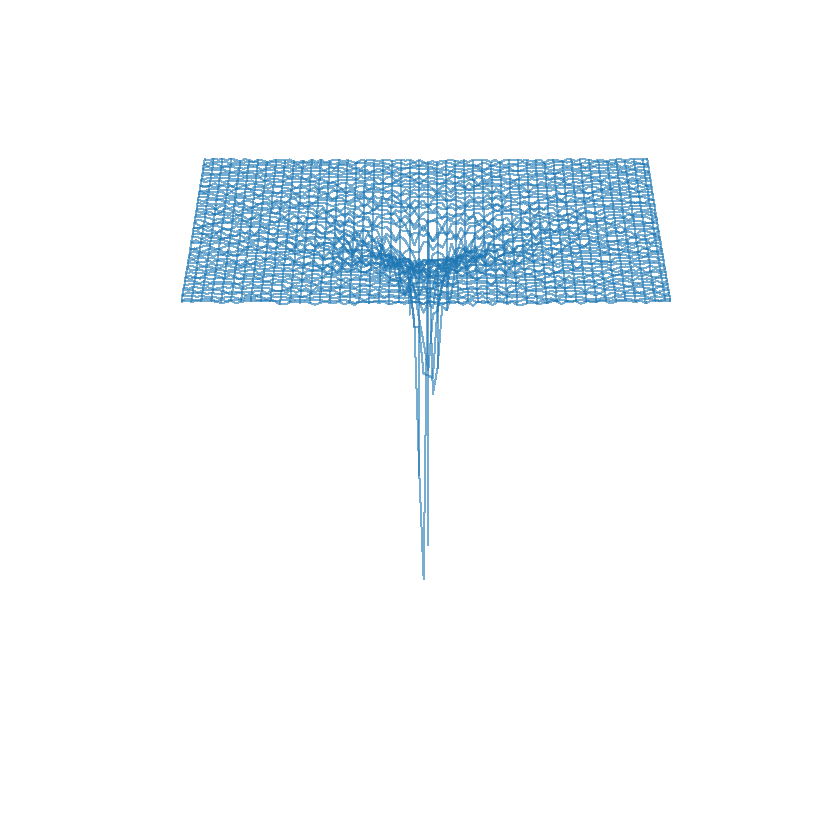

In [14]:
# Plot the 3D wireframe graph
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Set labels for the x, y, and z axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot the wireframe with specified parameters
ax.plot_wireframe(X, Y, Z_plot, rstride=2, cstride=2, 
                  cmap='PuRd', linewidth=1, antialiased=False, alpha=0.6)

# Turn off the axis and set the viewing angle
ax.axis('off')
ax.view_init(elev=20, azim=0)

# Display the plot
plt.show()

# 2nd Plot

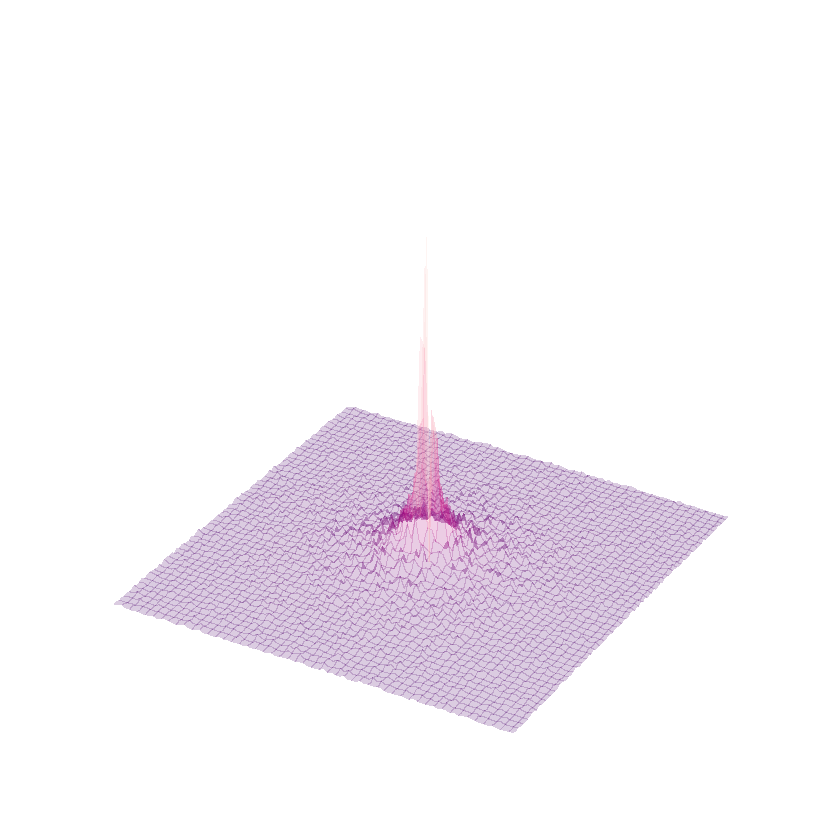

In [15]:
# Plot the 3D graph
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Set labels for the x, y, and z axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot the surface with specified parameters
ax.plot_surface(X, Y, -Z_plot, rstride=2, cstride=2, 
                cmap='RdPu_r', linewidth=3, antialiased=False, alpha=0.2)

# Turn off the axis and display the plot
ax.axis('off')
plt.show()


## Final Plot

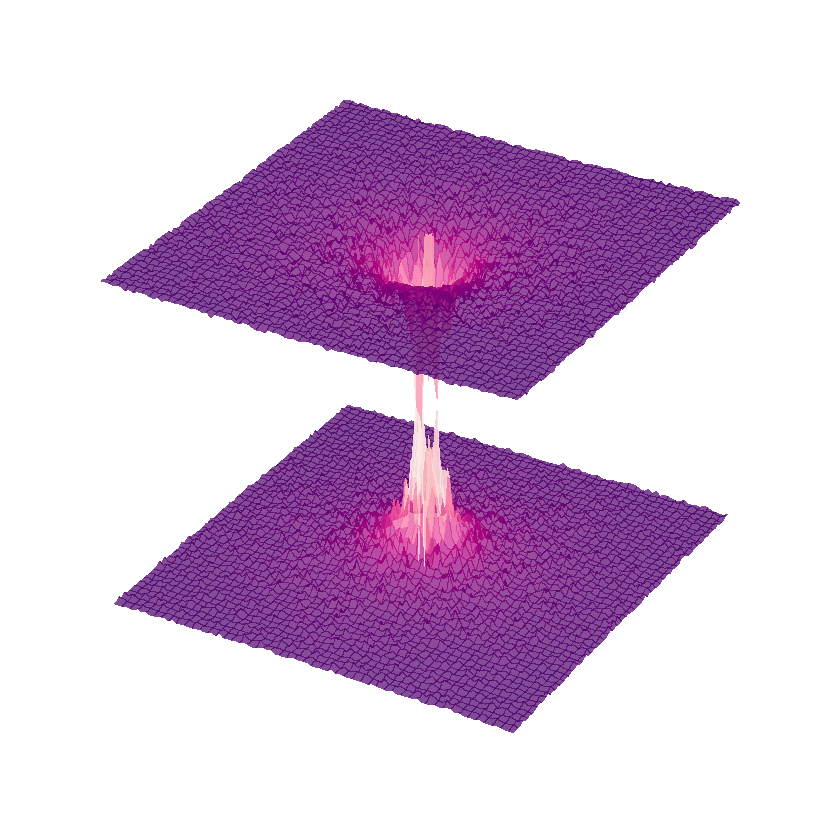

In [16]:
# Set all points with a potential less than -300/1.5
mask = Z < -300 / 1.5
Z_plot = Z - Z*mask

# Plot the 3D graph
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the upper half of the potential surface
ax.plot_surface(X, Y, Z_plot, rstride=2, cstride=2, 
                cmap='RdPu', linewidth=30, antialiased=False, alpha=0.7)

# Plot the lower half of the potential surface
ax.plot_surface(X, Y, -300-Z_plot, rstride=2, cstride=2, 
                cmap='RdPu_r', linewidth=30, antialiased=False, alpha=0.7)

ax.axis('off') # Turn off the axis labels
# Show the plot
plt.show()

# Otro Posible: Clifford_attractor

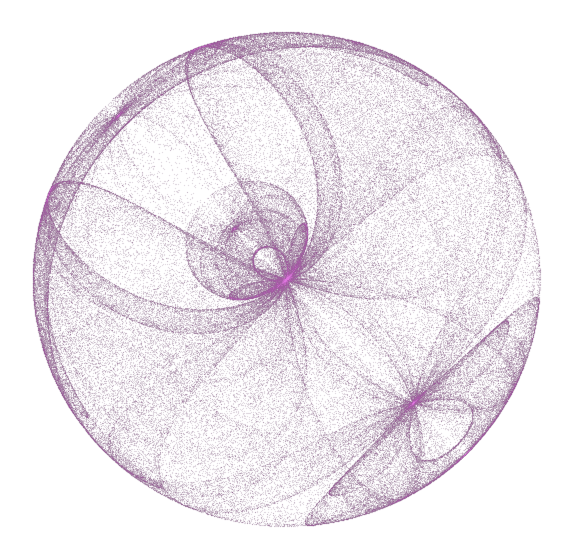

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def clifford_attractor(x, y, a=-1.4, b=1.7, c=1.0, d=0.7):
    """
    Return the next iteration of the Clifford attractor.

    Args:
        x (float): current x coordinate
        y (float): current y coordinate
        a (float): a parameter (default=-1.4)
        b (float): b parameter (default=1.7)
        c (float): c parameter (default=1.0)
        d (float): d parameter (default=0.7)

    Returns:
        tuple: the next x and y coordinates
    """
    x_next = np.sin(a * y) + c * np.cos(a * x)
    y_next = np.sin(b * x) + d * np.cos(b * y)    
    return x_next, y_next

# Clifford attractor parameters
params = {"a": 2, "b": 2, "c": 1, "d": -1}

# Number of points in the trajectory
n = 200000

# Initialize coordinates
x, y = np.zeros(n), np.zeros(n)

# Initial values of x and y
x[0], y[0] = 0.1, 0.1

# Generate the trajectory
for i in range(n - 1):
    x[i + 1], y[i + 1] = clifford_attractor(x[i], y[i], **params)

# Plot the trajectory
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(x, y, ".", color="black", alpha=0.2, markersize=0.5)
ax.plot(x, y, ".", color="violet", alpha=0.1, markersize=0.5)


ax.axis('off')
plt.savefig('CliffordBackGround.png', dpi = 300)
plt.show()